In [250]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sb


Content
A unicorn company, or unicorn startup, is a private company with a valuation over \\$1 billion. As of March 2022, there are 1,000 unicorns around the world. Popular former unicorns include Airbnb, Facebook and Google. Variants include a decacorn, valued at over \\$10 billion, and a hectocorn, valued at over \\$100 billion. Download the full list today to see each company's valuation, investors, and more.
The current data was downloaded from [Kaggle](https://www.kaggle.com/datasets/deepcontractor/unicorn-companies-dataset).

In [251]:
unicorn = pd.read_csv('./data/Unicorn_Companies.csv')

In [252]:
unicorn.head()

,Company,Valuation ($B),Date Joined,Country,City,Industry,Select Inverstors,Founded Year,Total Raised,Financial Stage,Investors Count,Deal Terms,Portfolio Exits
0,Bytedance,$140,4/7/2017,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S...",2012,$7.44B,IPO,28,8,5
1,SpaceX,$100.3,12/1/2012,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen...",2002,$6.874B,None,29,12,None
2,Stripe,$95,1/23/2014,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG",2010,$2.901B,Asset,39,12,1
3,Klarna,$45.6,12/12/2011,Sweden,Stockholm,Fintech,"Institutional Venture Partners, Sequoia Capita...",2005,$3.472B,Acquired,56,13,1
4,Epic Games,$42,10/26/2018,United States,Cary,Other,"Tencent Holdings, KKR, Smash Ventures",1991,$4.377B,Acquired,25,5,2


## Data exploration

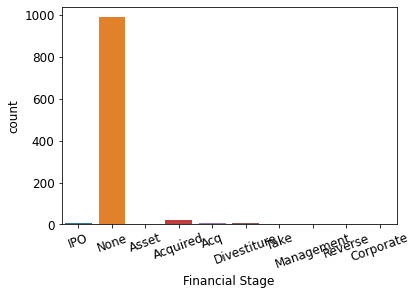

In [253]:
sb.countplot(data = unicorn, x = 'Financial Stage')
plt.xticks(rotation = 20);

In [254]:
unicorn['Financial Stage'].value_counts()

None           988
Acquired        22
Divestiture      8
IPO              7
Acq              7
Take             1
Asset            1
Corporate        1
Reverse          1
Management       1
Name: Financial Stage, dtype: int64

In [255]:
unicorn.shape

(1037, 13)

In [256]:
unicorn.columns

Index(['Company', 'Valuation ($B)', 'Date Joined', 'Country', 'City',
       'Industry', 'Select Inverstors', 'Founded Year', 'Total Raised',
       'Financial Stage', 'Investors Count', 'Deal Terms', 'Portfolio Exits'],
      dtype='object')

In [257]:
unicorn.describe()

,Company,Valuation ($B),Date Joined,Country,City,Industry,Select Inverstors,Founded Year,Total Raised,Financial Stage,Investors Count,Deal Terms,Portfolio Exits
count,1037,1037,1037,1037,1037,1037,1037,1037,1037,1037,1037,1037,1037
unique,1035,200,623,46,256,33,1006,37,914,10,54,16,5
top,Bolt,$1,7/13/2021,United States,San Francisco,Fintech,None,2015,None,None,10,1,None
freq,2,244,9,536,145,205,17,144,24,988,69,280,988


## Data cleaning
Part of data cleaning codes were borrowed from [Kaggle](https://www.kaggle.com/code/realmikebrew/basic-data-cleaning-and-eda), but I made some corrections to the codes.

In [258]:
unicorn['Financial Stage'].unique()

array(['IPO', 'None', 'Asset', 'Acquired', 'Acq', 'Divestiture', 'Take',
       'Management', 'Reverse', 'Corporate'], dtype=object)

In [259]:
unicorn['Year Joined'] = pd.DatetimeIndex(unicorn['Date Joined']).year

In [260]:
# Fix simple spelling error
unicorn = unicorn.rename(columns={'Select Inverstors': 'Select Investors'})

In [261]:
# Replace other spelling/input errors
unicorn.replace({
    'Artificial intelligence': 'Artificial Intelligence',
    'Finttech': 'Fintech',
    'United States,': 'United States',
    'Indonesia,': 'Indonesia',
}, inplace=True)

In [262]:
# Get rid of $ symbol and convert string column to float
unicorn['Valuation ($B)'] = unicorn['Valuation ($B)'].replace({'\$': ''}, regex=True)
unicorn['Valuation ($B)'] = unicorn['Valuation ($B)'].astype(float)

In [263]:
# Also converting Investor Count will be helpful later
# First, replace None values with 0
unicorn['Investors Count'] = unicorn['Investors Count'].replace({'None': '0'}, regex=True)
unicorn['Investors Count'] = unicorn['Investors Count'].astype(float)

In [264]:
unicorn['Deal Terms'].unique()

array(['8', '12', '13', '5', '4', '6', '3', '10', '9', '19', '1', '7',
       '2', '11', 'None', '14'], dtype=object)

In [265]:
unicorn['Deal Terms'] =unicorn['Deal Terms'].replace({'None': '0'}, regex=True)
unicorn['Deal Terms'] = unicorn['Deal Terms'].astype(float)

In [266]:
def transform_amount(cell):
    if cell == 0:
        transformed = cell
    elif 'M' in cell:
        transformed = cell.replace('M', '')
        transformed = float(transformed) * 1000
    elif 'B' in cell:
        transformed = cell.replace('B', '')
        transformed = float(transformed) * 1000000
    elif 'K' in cell:
        transformed = cell.replace('K', '')
        transformed = float(transformed)
    return(transformed)       

In [267]:
# Many characters need replaced in this column
unicorn['Total Raised'] = unicorn['Total Raised'].replace({'\$': ''}, regex=True)
unicorn['Total Raised'] = unicorn['Total Raised'].replace({'None': 0}, regex=True)
unicorn['Total Raised'] = unicorn['Total Raised'].apply(transform_amount)
unicorn['Total Raised'] = unicorn['Total Raised'].astype(float)
unicorn = unicorn.rename(columns={'Total Raised': 'Total Raised ($K)'})

In [268]:
unicorn.head()

,Company,Valuation ($B),Date Joined,Country,City,Industry,Select Investors,Founded Year,Total Raised ($K),Financial Stage,Investors Count,Deal Terms,Portfolio Exits,Year Joined
0,Bytedance,140.0,4/7/2017,China,Beijing,Artificial Intelligence,"Sequoia Capital China, SIG Asia Investments, S...",2012,7440000.0,IPO,28.0,8.0,5,2017
1,SpaceX,100.3,12/1/2012,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen...",2002,6874000.0,None,29.0,12.0,None,2012
2,Stripe,95.0,1/23/2014,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG",2010,2901000.0,Asset,39.0,12.0,1,2014
3,Klarna,45.6,12/12/2011,Sweden,Stockholm,Fintech,"Institutional Venture Partners, Sequoia Capita...",2005,3472000.0,Acquired,56.0,13.0,1,2011
4,Epic Games,42.0,10/26/2018,United States,Cary,Other,"Tencent Holdings, KKR, Smash Ventures",1991,4377000.0,Acquired,25.0,5.0,2,2018


In [269]:
# Many Cities and Industries are mistakenly swapped
unicorn['Industry'].unique()

array(['Artificial Intelligence', 'Other', 'Fintech',
       'Internet software & services',
       'Supply chain, logistics, & delivery',
       'Data management & analytics',
       'Sequoia Capital, Thoma Bravo, Softbank',
       'E-commerce & direct-to-consumer', 'Edtech', 'Hardware',
       'Consumer & retail', 'Health', 'Auto & transportation',
       'Cybersecurity', 'Mobile & telecommunications', 'Travel',
       'Kuang-Chi',
       'Tiger Global Management, Tiger Brokers, DCM Ventures',
       'Jungle Ventures, Accel, Venture Highway',
       'Vision Plus Capital, GSR Ventures, ZhenFund',
       'Hopu Investment Management, Boyu Capital, DC Thomson Ventures',
       '500 Global, Rakuten Ventures, Golden Gate Ventures',
       'Sequoia Capital China, ING, Alibaba Entrepreneurs Fund',
       'Sequoia Capital China, Shunwei Capital Partners, Qualgro',
       'Dragonfly Captial, Qiming Venture Partners, DST Global',
       'SingTel Innov8, Alpha JWC Ventures, Golden Gate Ventures'

In [270]:
unicorn['Industry'].value_counts()

Fintech                                                               206
Internet software & services                                          192
E-commerce & direct-to-consumer                                       107
Artificial Intelligence                                                78
Health                                                                 69
Supply chain, logistics, & delivery                                    57
Other                                                                  56
Cybersecurity                                                          49
Data management & analytics                                            41
Mobile & telecommunications                                            37
Hardware                                                               33
Auto & transportation                                                  29
Edtech                                                                 28
Consumer & retail                     

In [271]:
# Swap columns with invalid input
industries = ['Artificial Intelligence', 'Other', 'Fintech',
       'Internet software & services',
       'Supply chain, logistics, & delivery',
       'Data management & analytics', 'E-commerce & direct-to-consumer', 'Edtech', 'Hardware',
       'Consumer & retail', 'Health', 'Auto & transportation',
       'Cybersecurity', 'Mobile & telecommunications', 'Travel']

In [272]:
unicorn['City'].value_counts()

San Francisco    145
New York          96
Beijing           63
Shanghai          43
London            33
                ... 
Unterfoehring      1
Petah Tikva        1
Somerville         1
Vilnius            1
Eden Prairie       1
Name: City, Length: 256, dtype: int64

In [273]:
unicorn['Industry'], unicorn['City'] = np.where(~unicorn['Industry'].isin(industries), (unicorn['City'],unicorn['Industry']), (unicorn['Industry'],unicorn['City']))


In [274]:
unicorn['Industry'].value_counts()

Fintech                                212
Internet software & services           194
E-commerce & direct-to-consumer        111
Artificial Intelligence                 80
Health                                  69
Supply chain, logistics, & delivery     58
Other                                   56
Cybersecurity                           49
Data management & analytics             41
Mobile & telecommunications             38
Hardware                                33
Auto & transportation                   29
Edtech                                  28
Consumer & retail                       25
Travel                                  14
Name: Industry, dtype: int64

In [275]:
unicorn['City'].value_counts()

San Francisco    145
New York          96
Beijing           63
Shanghai          43
London            33
                ... 
Wilmington         1
Peterborough       1
Unterfoehring      1
Petah Tikva        1
Eden Prairie       1
Name: City, Length: 266, dtype: int64

In [276]:
unicorn.head()

,Company,Valuation ($B),Date Joined,Country,City,Industry,Select Investors,Founded Year,Total Raised ($K),Financial Stage,Investors Count,Deal Terms,Portfolio Exits,Year Joined
0,Bytedance,140.0,4/7/2017,China,Beijing,Artificial Intelligence,"Sequoia Capital China, SIG Asia Investments, S...",2012,7440000.0,IPO,28.0,8.0,5,2017
1,SpaceX,100.3,12/1/2012,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen...",2002,6874000.0,None,29.0,12.0,None,2012
2,Stripe,95.0,1/23/2014,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG",2010,2901000.0,Asset,39.0,12.0,1,2014
3,Klarna,45.6,12/12/2011,Sweden,Stockholm,Fintech,"Institutional Venture Partners, Sequoia Capita...",2005,3472000.0,Acquired,56.0,13.0,1,2011
4,Epic Games,42.0,10/26/2018,United States,Cary,Other,"Tencent Holdings, KKR, Smash Ventures",1991,4377000.0,Acquired,25.0,5.0,2,2018


## Exploring data and generating questions

Text(0.5, 0, 'Count of unicorn companies')

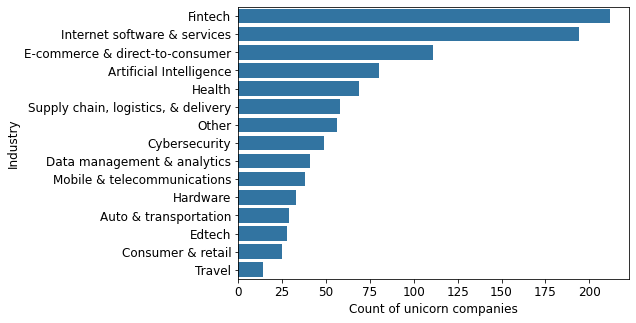

In [277]:
# Which industry has most unicorns?
plt.figure(figsize = (7,5))
base_color = sb.color_palette()[0]
sb.countplot(data = unicorn, y = 'Industry', order= unicorn['Industry'].value_counts().index, color=base_color)
plt.xlabel('Count of unicorn companies')

In [278]:
unicorn_subset = unicorn.loc[unicorn['Country'].isin(['China', 'United States'])]
unicorn_industry_china = unicorn.loc[unicorn['Country'] == 'China']
industry_count_china = unicorn_industry_china['Industry'].value_counts()
china_prop = industry_count_china.values /industry_count_china.sum()
china_prop_df = pd.DataFrame({'Industry': industry_count_china.index, 'Proportion_China': china_prop})
china_prop_df.head()

unicorn_industry_us = unicorn.loc[unicorn['Country'] == 'United States']
industry_count_us = unicorn_industry_us['Industry'].value_counts()
us_prop = industry_count_us.values /industry_count_us.sum()
us_prop_df = pd.DataFrame({'Industry': industry_count_us.index, 'Proportion_US': us_prop})
us_prop_df.head()

prop_combined = pd.merge(china_prop_df, us_prop_df, on = 'Industry')
prop_combined['Proportion_difference'] = prop_combined['Proportion_China'] - prop_combined['Proportion_US'] 
prop_combined.head()


,Industry,Proportion_China,Proportion_US,Proportion_difference
0,E-commerce & direct-to-consumer,0.172619,0.055970,0.116649
1,Artificial Intelligence,0.113095,0.080224,0.032871
2,Hardware,0.101190,0.018657,0.082534
3,Auto & transportation,0.101190,0.005597,0.095593
4,Mobile & telecommunications,0.083333,0.022388,0.060945


In [279]:
order = prop_combined.sort_values('Proportion_difference')['Industry']

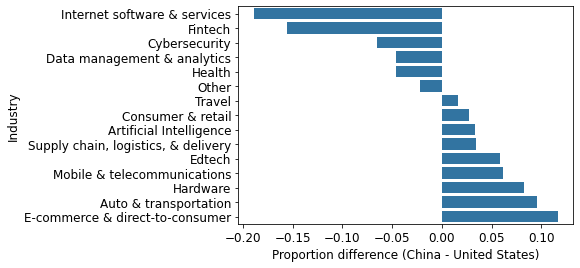

In [280]:
sb.barplot(data = prop_combined, y = 'Industry', x = 'Proportion_difference', order= order, color = base_color);
plt.xlabel('Proportion difference (China - United States)');

In [281]:
us_prop

array([0.26679104, 0.20335821, 0.09328358, 0.08022388, 0.07089552,
       0.05783582, 0.05597015, 0.05223881, 0.03731343, 0.02238806,
       0.02052239, 0.01865672, 0.0130597 , 0.00559701, 0.00186567])

In [282]:
unicorn['Founded Year'].unique()
unicorn['Founded Year'].replace({'None':np.nan}, inplace = True)
unicorn['Founded Year'] = unicorn['Founded Year'].astype(float)
unicorn['Founded Year'].describe()

count     994.000000
mean     2012.710262
std         5.942876
min      1919.000000
25%      2011.000000
50%      2014.000000
75%      2016.000000
max      2021.000000
Name: Founded Year, dtype: float64

In [283]:
unicorn['Year until unicorn'] = unicorn['Year Joined'] - unicorn['Founded Year']

Text(0, 0.5, 'Count of unicorn companies')

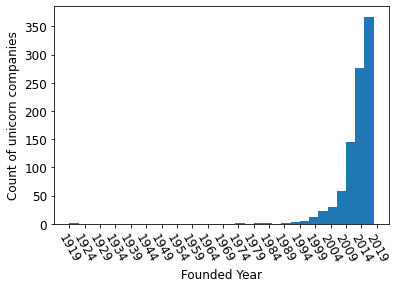

In [284]:
#When were the unicorn companies founded?
bins = np.arange(1919, 2021, 3)
plt.hist(data = unicorn, x = 'Founded Year', bins =bins);
plt.xticks(rotation = 300);
tick_pos = np.arange(1919, 2021, 5)
tick_names = ['{:0.0f}'.format(v) for v in tick_pos]
plt.xticks(tick_pos, tick_names);
plt.xlabel('Founded Year')
plt.ylabel('Count of unicorn companies')

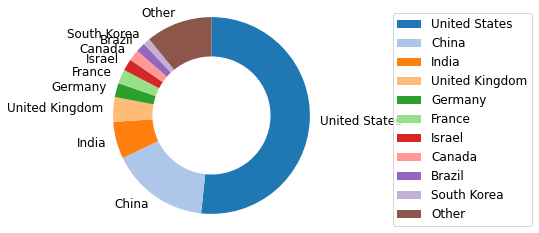

In [285]:
# Where are the unicorn companies?
sorted_counts = unicorn['Country'].value_counts()
other = pd.Series([sorted_counts[[not x for x in sorted_counts.index.isin(sorted_counts[:10].index)]].sum()], index = ['Other'])
show_counts = sorted_counts[:10]
show_counts = show_counts.append(other)

plt.pie(show_counts, labels = ['{}'.format(v) for v in show_counts.index], startangle = 90, counterclock = False, wedgeprops = {'width' : 0.4},
       colors = sb.color_palette("tab20"));
plt.legend(bbox_to_anchor=(2,1));
plt.axis('square');

In [286]:
#Top 10 unicorn companies with highest valuation from China
unicorn['Valuation ($B)'].describe()
sorted_rows = unicorn['Valuation ($B)'].sort_values(ascending=False).index
sorted_rows

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
             867,  868,  869,  870,  871,  872,  873,  874,  875, 1036],
           dtype='int64', length=1037)

In [287]:
unicorn_sortvaluation = unicorn.loc[sorted_rows]

In [288]:
SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 12

plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

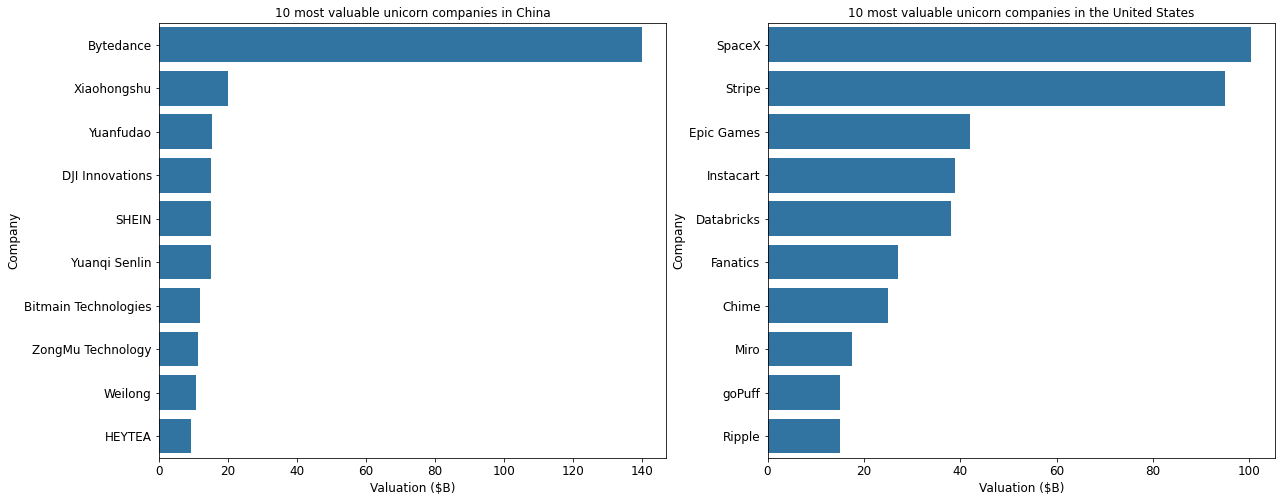

In [289]:
plt.figure(figsize = [20, 8])
base_color = sb.color_palette()[0]
# left
plt.subplot(1, 2, 1)
unicorn_10China = unicorn_sortvaluation.loc[unicorn_sortvaluation['Country'] == 'China'][:10]
unicorn_10China
sb.barplot(data = unicorn_10China, y = 'Company', x = 'Valuation ($B)', color = base_color);
plt.title('10 most valuable unicorn companies in China')

# right
plt.subplot(1, 2, 2)
unicorn_10US = unicorn_sortvaluation.loc[unicorn_sortvaluation['Country'] == 'United States'][:10]
unicorn_10US
sb.barplot(data = unicorn_10US, y = 'Company', x = 'Valuation ($B)', color = base_color);
plt.title('10 most valuable unicorn companies in the United States')
g = plt.show()

In [290]:
# 2 most valuable unicorn companies in other countries
mv_companies2 =pd.DataFrame([])
for country in ['India', 'United Kingdom', 'Germany', 'France', 'Israel']:
    mv_companies2 = pd.concat([mv_companies2, unicorn_sortvaluation.loc[unicorn_sortvaluation['Country'] == country][:2]])
mv_companies2[['Company','Valuation ($B)', 'Country', 'Industry']]                              


,Company,Valuation ($B),Country,Industry
13,BYJU's,21.00,India,Edtech
40,Swiggy,10.70,India,"Supply chain, logistics, & delivery"
6,Checkout.com,40.00,United Kingdom,Fintech
9,Revolut,33.00,United Kingdom,Fintech
36,Celonis,11.00,Germany,Data management & analytics
52,N26,9.23,Germany,Fintech
113,Back Market,5.70,France,E-commerce & direct-to-consumer
139,Qonto,5.00,France,Fintech
103,Wiz,6.00,Israel,Cybersecurity
136,Moon Active,5.00,Israel,Mobile & telecommunications


In [291]:
# maybe we can copy the most successful investors in investing unicorn companies
investors = {}
item = unicorn['Select Investors'][0].split(', ')[0]
item = 'SIG Asia Investments'
investors['SIG Asia Investments'] =  1
investors


{'SIG Asia Investments': 1}

In [292]:
items = unicorn['Select Investors'][0].split(', ')
for item in items:
    if not item in investors:
        investors[item] =  1
    elif item in investors:
        investors[item] =  investors[item] +1
        
investors

{'SIG Asia Investments': 2,
 'Sequoia Capital China': 1,
 'Sina Weibo': 1,
 'Softbank Group': 1}

In [293]:
# Which investor invested the most unicorn companies in China and in the United States?
def get_investors(select_investors):
    investors = {}
    for cell in select_investors:
        items = cell.split(', ')
        for item in items:
            if not item in investors:
                investors[item] =  1
            elif item in investors:
                investors[item] = investors[item] +1
    investors_df = pd.DataFrame(list(investors.items()),columns = ['Investor','Count'])
    investors_df = investors_df.sort_values('Count', ascending=False)
    return investors_df

In [294]:
investor_china = get_investors(unicorn[unicorn['Country'] == 'China']['Select Investors'])
investor_china.head()

,Investor,Count
0,Sequoia Capital China,36
7,Tencent Holdings,17
9,IDG Capital,17
50,Qiming Venture Partners,11
91,Matrix Partners China,10


In [295]:
investor_us = get_investors(unicorn[unicorn['Country'] == 'United States']['Select Investors'])
investor_us.head()

,Investor,Count
11,Andreessen Horowitz,39
19,Accel,33
36,Sequoia Capital,33
40,Tiger Global Management,28
115,Insight Partners,27


In [296]:
invested_by_SC = lambda x: ('Sequoia Capital' in x) or ('Sequoia Capital China' in x)
unicorn_invested_by_SC = unicorn.loc[unicorn['Select Investors'].apply(invested_by_SC)]
unicorn_invested_by_SC['Financial Stage'].unique()

array(['IPO', 'Acquired', 'None', 'Divestiture'], dtype=object)

In [297]:
unicorn_invested_by_SC2019 = unicorn_invested_by_SC[unicorn_invested_by_SC['Founded Year' ] > 2018]
unicorn_invested_by_SC2019[['Company', 'Valuation ($B)', 'Date Joined', 'Country', 'Industry']]

,Company,Valuation ($B),Date Joined,Country,Industry
103,Wiz,6.0,3/17/2021,Israel,Cybersecurity
418,Ethos,2.7,5/11/2021,United States,Fintech
697,SmartMore,1.2,6/24/2021,China,Artificial Intelligence
758,apna,1.1,9/15/2021,India,Internet software & services
862,Playco,1.0,9/21/2020,Japan,Other
893,Fiture,1.0,4/14/2021,China,Health


In [298]:
unicorn.to_csv('./unicorn_companies_clean.csv')